In [1]:
%matplotlib inline
import deepdish as dd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as patches
import numpy as np
import brainiak.eventseg.event
from scipy import stats
from scipy.stats import norm, zscore, pearsonr
from scipy.signal import gaussian, convolve
from sklearn import decomposition
import seaborn as sns 

In [2]:
shuffled_data=np.load("/home/peter/brainiakpython/multi_txt_embeddings/21styear/shuffled/data/21styear_shuffled_0.npy")
print(shuffled_data.shape)
intact_data=np.load("/home/peter/brainiakpython/multi_txt_embeddings/21styear/intact/data/21styear_intact_0.npy")
print(intact_data.shape)

(2272, 100)
(2272, 100)


In [3]:
variability_array = np.zeros((8,2,4))
print(variability_array.shape)
ll_array = np.zeros((8,2,4))
print(ll_array.shape)

(8, 2, 4)
(8, 2, 4)


In [4]:
counter = 0
for nar_text in ["sherlock", "merlin", "pieman", "black", "forgot", "21styear", "bronx", "piemanpni"]:
    print(nar_text)
    shuffled_data=np.load("/home/peter/brainiakpython/multi_txt_embeddings/%s/shuffled/data/%s_shuffled_0.npy" % (nar_text, nar_text))
    print(shuffled_data.shape)
    intact_data=np.load("/home/peter/brainiakpython/multi_txt_embeddings/%s/intact/data/%s_intact_0.npy" % (nar_text, nar_text))
    print(intact_data.shape)
    
    scale_count = 0
    for scale in [20,50,100,150]:
        print("HMM Segmentation scale: ", scale)
        ev1 = brainiak.eventseg.event.EventSegment(scale)
        ev1.fit(shuffled_data)
        variability_array[counter,1,scale_count] = ev1.event_var_
        ll_array[counter,1,scale_count] = ev1.ll_[len(ev1.ll_)-1]
        print("Shuffled:  variability :", ev1.event_var_, " log likelihood: ", ev1.ll_[len(ev1.ll_)-1])

        ev1.fit(intact_data)
        print("Intact:  variability :", ev1.event_var_, " log likelihood: ", ev1.ll_[len(ev1.ll_)-1])
        variability_array[counter,0,scale_count] = ev1.event_var_
        ll_array[counter,0,scale_count] = ev1.ll_[len(ev1.ll_)-1]
        scale_count = scale_count + 1
    
    counter= counter + 1
   

sherlock
(2401, 100)
(2401, 100)
HMM Segmentation scale:  20
Shuffled:  variability : 1.8191853222487786  log likelihood:  [-4149.10137398]
Intact:  variability : 1.782801615803803  log likelihood:  [-4118.36696654]
HMM Segmentation scale:  50
Shuffled:  variability : 1.7471455834877267  log likelihood:  [-4118.62303666]
Intact:  variability : 1.7122026718179721  log likelihood:  [-4085.60477831]
HMM Segmentation scale:  100
Shuffled:  variability : 1.6779586183816129  log likelihood:  [-4086.49870188]
Intact:  variability : 1.6443994460139806  log likelihood:  [-4053.70174136]
HMM Segmentation scale:  150
Shuffled:  variability : 1.6443994460139806  log likelihood:  [-4061.77942325]
Intact:  variability : 1.5792812279518267  log likelihood:  [-4029.34785527]
merlin
(2223, 100)
(2223, 100)
HMM Segmentation scale:  20
Shuffled:  variability : 1.8191853222487786  log likelihood:  [-3845.30119422]
Intact:  variability : 1.782801615803803  log likelihood:  [-3821.7469561]
HMM Segmentation 

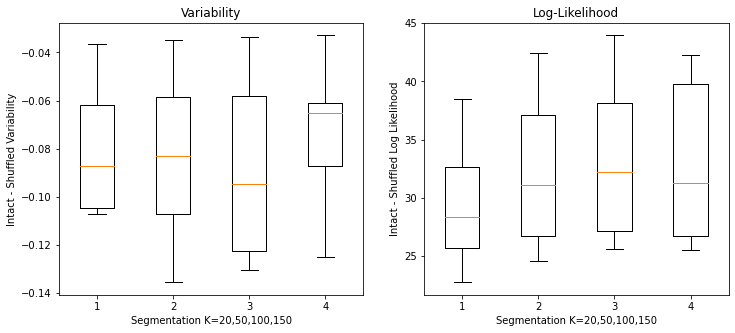

In [40]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Variability")
plt.xlabel('Segmentation K=20,50,100,150')
plt.ylabel('Intact - Shuffled Variability')

plt.boxplot(variability_array[:,0,:]-variability_array[:,1,:] )

plt.subplot(1,2,2)
plt.title("Log-Likelihood")
plt.xlabel('Segmentation K=20,50,100,150')
plt.ylabel('Intact - Shuffled Log Likelihood')
plt.boxplot(ll_array[:,0,:]-ll_array[:,1,:],showfliers=False)
plt.show()

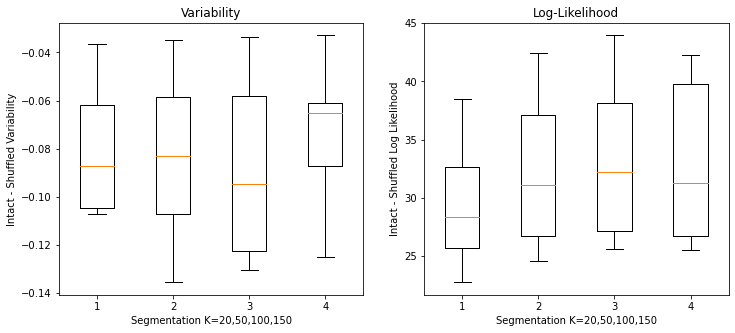

In [65]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Variability")
plt.xlabel('Segmentation K=20,50,100,150')
plt.ylabel('Intact - Shuffled Variability')

plt.boxplot(variability_array[:,0,:]-variability_array[:,1,:] )

plt.subplot(1,2,2)
plt.title("Log-Likelihood")
plt.xlabel('Segmentation K=20,50,100,150')
plt.ylabel('Intact - Shuffled Log Likelihood')
plt.boxplot(ll_array[:,0,:]-ll_array[:,1,:],showfliers=False)
plt.show()

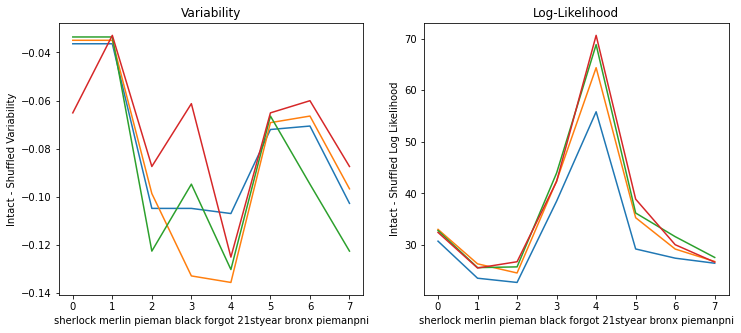

In [62]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Variability")
plt.xlabel('sherlock merlin pieman black forgot 21styear bronx piemanpni')
plt.ylabel('Intact - Shuffled Variability')

plt.plot(variability_array[:,0,:]-variability_array[:,1,:] )

plt.subplot(1,2,2)
plt.title("Log-Likelihood")
plt.xlabel('sherlock merlin pieman black forgot 21styear bronx piemanpni')
plt.ylabel('Intact - Shuffled Log Likelihood')
plt.plot(ll_array[:,0,:]-ll_array[:,1,:])
plt.show()

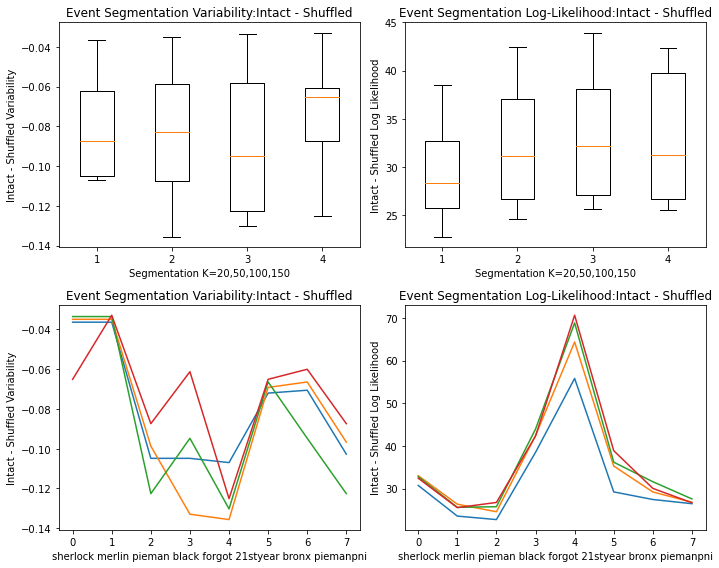

In [55]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
plt.title("Event Segmentation Variability:Intact - Shuffled")
plt.xlabel('Segmentation K=20,50,100,150')
plt.ylabel('Intact - Shuffled Variability')

plt.boxplot(variability_array[:,0,:]-variability_array[:,1,:] )

plt.subplot(2,2,2)
plt.title("Event Segmentation Log-Likelihood:Intact - Shuffled")
plt.xlabel('Segmentation K=20,50,100,150')
plt.ylabel('Intact - Shuffled Log Likelihood')
plt.boxplot(ll_array[:,0,:]-ll_array[:,1,:],showfliers=False)

plt.subplot(2,2,3)
plt.title("Event Segmentation Variability:Intact - Shuffled")
plt.xlabel('sherlock merlin pieman black forgot 21styear bronx piemanpni')
plt.ylabel('Intact - Shuffled Variability')

plt.plot(variability_array[:,0,:]-variability_array[:,1,:] )

plt.subplot(2,2,4)
plt.title("Event Segmentation Log-Likelihood:Intact - Shuffled")
plt.xlabel('sherlock merlin pieman black forgot 21styear bronx piemanpni')
plt.ylabel('Intact - Shuffled Log Likelihood')
plt.plot(ll_array[:,0,:]-ll_array[:,1,:])
plt.tight_layout()
plt.savefig('HMM-embeddings.png')
plt.show()

In [58]:
print("ttest - ll differences:  ",stats.ttest_rel(ll_array[:,0,:],ll_array[:,1,:]))
print("ttest - variability dif: ",stats.ttest_rel(variability_array[:,0,:],variability_array[:,1,:]))

ttest - ll differences:   Ttest_relResult(statistic=array([8.27675351, 7.59749817, 7.17604636, 6.9144508 ]), pvalue=array([7.33109466e-05, 1.26545009e-04, 1.81194339e-04, 2.28346932e-04]))
ttest - variability dif:  Ttest_relResult(statistic=array([-7.40372029, -6.03247253, -6.32875261, -7.60422818]), pvalue=array([0.00014895, 0.00052501, 0.00039315, 0.00012584]))


In [13]:
# 2 set up the segmentation HMM
ev1 = brainiak.eventseg.event.EventSegment(100)
ev1.fit(intact_data)
print("Intact:  variability :", ev1.event_var_, " log likelihood: ", ev1.ll_[len(ev1.ll_)-1])
ev1.fit(shuffled_data)
print("Shuffled:  variability :", ev1.event_var_, " log likelihood: ", ev1.ll_[len(ev1.ll_)-1])


Intact:  variability : 1.456678720348467  log likelihood:  [-1536.42228785]
Shuffled:  variability : 1.5792812279518267  log likelihood:  [-1564.00196637]


In [14]:
ev1 = brainiak.eventseg.event.EventSegment(20)
ev1.fit(shuffled_data)

#v1.fit(intact_data)



EventSegment(event_chains=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.]),
             n_events=20)

Text(0, 0.5, 'Embeddings')

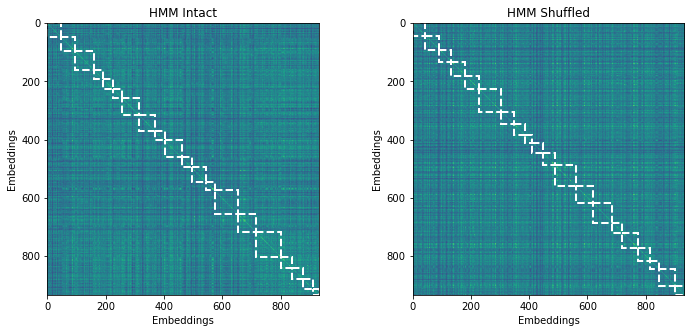

In [15]:
# 3 display the segmentation

ev1 = brainiak.eventseg.event.EventSegment(20)


plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
ev1.fit(intact_data)
bounds = np.where(np.diff(np.argmax(ev1.segments_[0], axis=1)))[0]
nTR=933

plt.imshow(np.corrcoef(intact_data),cmap='viridis')
#plt.imshow(np.corrcoef(reservoir_data),cmap='gist_rainbow')
ax = plt.gca()
bounds_aug = np.concatenate(([0],bounds,[nTR]))
for i in range(len(bounds_aug)-1):
    rect = patches.Rectangle((bounds_aug[i],bounds_aug[i]),bounds_aug[i+1]-bounds_aug[i],bounds_aug[i+1]-bounds_aug[i],linewidth=2, linestyle='--',edgecolor='w',facecolor='none')
    ax.add_patch(rect)


plt.title("HMM Intact")
plt.xlabel('Embeddings')
plt.ylabel('Embeddings')

plt.subplot(1,2,2)
ev1.fit(shuffled_data)
bounds = np.where(np.diff(np.argmax(ev1.segments_[0], axis=1)))[0]
nTR=933

plt.imshow(np.corrcoef(shuffled_data),cmap='viridis')
#plt.imshow(np.corrcoef(reservoir_data),cmap='gist_rainbow')
ax = plt.gca()
bounds_aug = np.concatenate(([0],bounds,[nTR]))
for i in range(len(bounds_aug)-1):
    rect = patches.Rectangle((bounds_aug[i],bounds_aug[i]),bounds_aug[i+1]-bounds_aug[i],bounds_aug[i+1]-bounds_aug[i],linewidth=2, linestyle='--',edgecolor='w',facecolor='none')
    ax.add_patch(rect)


plt.title("HMM Shuffled")
plt.xlabel('Embeddings')
plt.ylabel('Embeddings')
#plt.savefig('EEG_18-22-start.png')

In [67]:
np.save("ll_array.npy",ll_array)
np.save("variability_array.npy",variability_array)